In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import torch
from utils.visualization import visualize_rel_error_report

DATA_SOURCE = Path.cwd().parent / 'data' / 'input' / 'raw'
VAL_SOURCE = DATA_SOURCE.parent / 'validation'
PROC_SOURCE = DATA_SOURCE.parent/ "processed"
PREDS_SINK = PROC_SOURCE.parent.parent / 'output'
MODELS_SINK = PREDS_SINK.parent / 'models' / 'kfold_1_subsamples_4_cherrypicking'

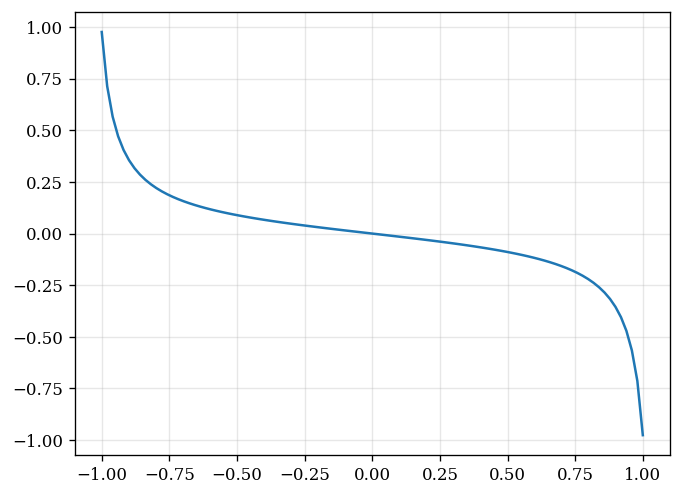

In [2]:
# new ts feature: Closeness to B max
x = np.linspace(-1, 1, 100)
plt.plot(x, -np.tan(0.9*np.tan(x))/6)

# Demonstrate Error Report as requested by Competition hosts

In [3]:
ds = pd.read_pickle(PROC_SOURCE / f"ten_materials.pkl.gz")
preds = pd.read_csv(PREDS_SINK / "CNN_H_preds_16-Sep-2023_06:55_Uhr_score_2.86.csv.zip", dtype={'material': str})
preds.head()


,h_pred_0,h_pred_1,h_pred_2,h_pred_3,h_pred_4,h_pred_5,h_pred_6,h_pred_7,h_pred_8,h_pred_9,...,h_pred_247,h_pred_248,h_pred_249,h_pred_250,h_pred_251,h_pred_252,h_pred_253,h_pred_254,h_pred_255,material
0,0.714668,0.909284,1.103977,1.296980,1.490212,1.681428,1.872314,2.062504,2.249653,2.438087,...,-1.060407,-0.862645,-0.664151,-0.467115,-0.268882,-0.072137,0.125524,0.322755,0.517967,3C90
1,0.975265,1.188871,1.400251,1.608974,1.816931,2.025048,2.226797,2.433178,2.635253,2.835511,...,-0.956705,-0.740137,-0.521885,-0.309908,-0.090844,0.121551,0.336759,0.550529,0.766220,3C90
2,0.696088,0.946323,1.187844,1.434380,1.678053,1.918527,2.161442,2.400526,2.637257,2.875402,...,-1.525870,-1.280624,-1.033401,-0.784170,-0.537422,-0.289253,-0.043590,0.205259,0.452528,3C90
3,0.859509,1.120245,1.377148,1.634529,1.891866,2.142265,2.395572,2.653619,2.894612,3.145429,...,-1.504481,-1.246249,-0.976569,-0.715561,-0.452526,-0.186666,0.073607,0.338931,0.600424,3C90
4,1.008664,1.297022,1.588304,1.874021,2.160510,2.443765,2.729599,3.010260,3.290040,3.568973,...,-1.622988,-1.328823,-1.034116,-0.741571,-0.449133,-0.155512,0.138793,0.426770,0.719093,3C90


In [4]:
ds.head()

,B_t_0,B_t_1,B_t_2,B_t_3,B_t_4,B_t_5,B_t_6,B_t_7,B_t_8,B_t_9,...,H_t_1016,H_t_1017,H_t_1018,H_t_1019,H_t_1020,H_t_1021,H_t_1022,H_t_1023,temp,material
0,0.000543,0.000738,0.000931,0.001125,0.001318,0.001512,0.001705,0.001899,0.002092,0.002285,...,0.165817,0.217184,0.262436,0.318943,0.356962,0.420480,0.472374,0.561112,25,3C90
1,0.001237,0.001455,0.001672,0.001889,0.002105,0.002322,0.002539,0.002756,0.002974,0.003190,...,0.379391,0.458352,0.521983,0.605903,0.633065,0.667338,0.739250,0.801744,25,3C90
2,-0.000301,-0.000056,0.000188,0.000433,0.000677,0.000922,0.001166,0.001411,0.001656,0.001900,...,0.128187,0.177880,0.234162,0.305163,0.380533,0.456232,0.492321,0.534606,25,3C90
3,-0.000294,-0.000020,0.000254,0.000527,0.000801,0.001075,0.001349,0.001622,0.001894,0.002167,...,0.234407,0.308815,0.353589,0.389211,0.478962,0.594649,0.621135,0.647840,25,3C90
4,-0.000164,0.000141,0.000447,0.000752,0.001058,0.001364,0.001669,0.001973,0.002278,0.002584,...,0.401663,0.438609,0.538218,0.618047,0.699562,0.735218,0.849940,0.949029,25,3C90


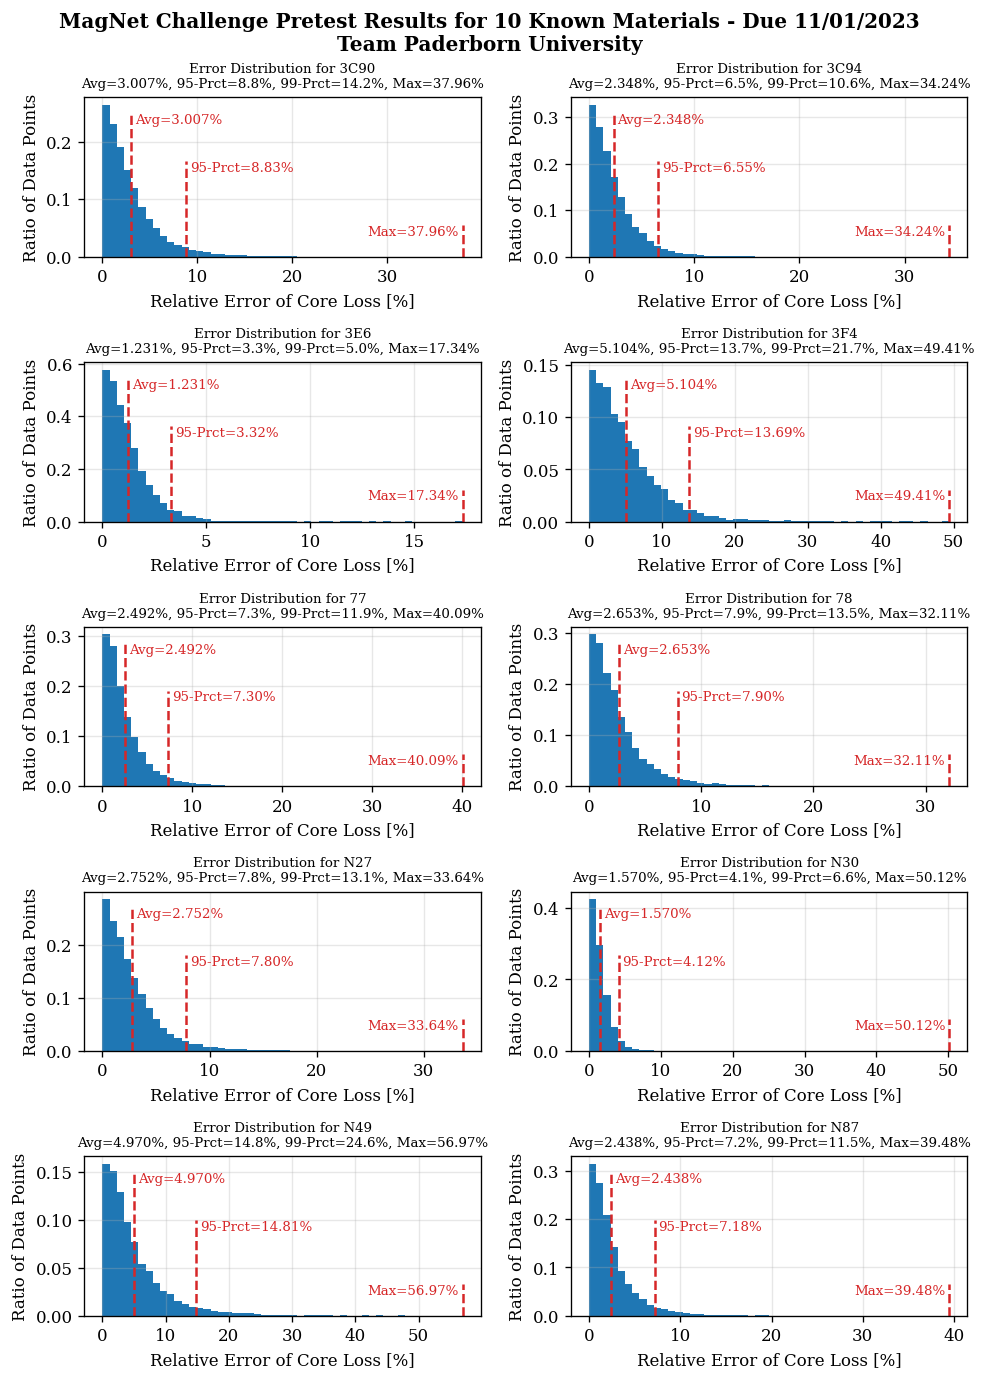

In [5]:
fig = visualize_rel_error_report(preds, ds)
fig.savefig(PREDS_SINK.parent.parent / 'docs' / "error_report.pdf", dpi=300, bbox_inches='tight')

# Create Visuals for validation data (due first Nov. 2023)
By loading a trained model and execute on the validation data

In [6]:
from utils.experiments import get_waveform_est, BSAT_MAP
from run_cnn import B_COLS, H_COLS, construct_tensor_seq2seq

In [8]:

# Wilhelm original example
# mdl = torch.jit.load(MODELS_SINK / "cnn_3C90_02-Oct-2023_16:18_Uhr_score_7.07_seed_2_fold_0.pt")
# new trial and test
mdl = torch.jit.load(MODELS_SINK / "cnn_3C90_06-Oct-2023_02:31_Uhr_score_2.99_seed_2_fold_0.pt")
mdl.eval()

RecursiveScriptModule(
  original_name=TCNWithScalarsAsBias
  (b_proc_layer): RecursiveScriptModule(
    original_name=TemporalBlock
    (conv1): RecursiveScriptModule(original_name=Conv1d)
    (relu1): RecursiveScriptModule(original_name=Tanh)
    (dropout1): RecursiveScriptModule(original_name=Dropout1d)
    (net): RecursiveScriptModule(
      original_name=Sequential
      (0): RecursiveScriptModule(original_name=Conv1d)
      (1): RecursiveScriptModule(original_name=Tanh)
      (2): RecursiveScriptModule(original_name=Dropout1d)
    )
    (relu): RecursiveScriptModule(original_name=ReLU)
  )
  (upper_tcn): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(
      original_name=TemporalBlock
      (conv1): RecursiveScriptModule(original_name=Conv1d)
      (relu1): RecursiveScriptModule(original_name=Tanh)
      (dropout1): RecursiveScriptModule(original_name=Dropout1d)
      (net): RecursiveScriptModule(
        original_name=Sequential
        (0): R

In [18]:
# load 3C90 validation sample and preprocess it
print("Read original data in..")
data_d = {}
print(f"{VAL_SOURCE = }")
for p in VAL_SOURCE.glob("*"):
    print(f"{p = }")
    if p.name != ".gitkeep":
        print(p.name)
        data_d[p.name] = {
            f.stem: pd.read_csv(f, index_col=None) for f in p.glob("*.csv")
        }

print(f"{data_d = }")

# store compact data set
col_translation = {
    "Volumetric_Loss": "ploss",
    "H_Waveform": "H",
    "B_waveform": "B",
    "Temperature": "temp",
    "Frequency": "freq",
}
dfs = []
print("Convert data..")
for k, v in data_d.items():
    series_l = []
    for q, arr in v.items():
        if arr.shape[-1] == 1:
            df = pd.Series(arr.to_numpy().ravel(), name=col_translation[q])
        else:
            df = pd.DataFrame(
                arr.to_numpy(),
                columns=[f"{col_translation[q]}_t_{j}" for j in range(arr.shape[1])],
            )
        series_l.append(df)
    mat_df = pd.concat(series_l, axis=1)
    mat_df.to_pickle(PROC_SOURCE / f"{k}.pkl.gz")
    dfs.append(mat_df.assign(material=k))

val_ds = pd.concat(dfs, ignore_index=True)


Read original data in..
VAL_SOURCE = PosixPath('/home/nikolasf/Dokumente/01_git/30_Python/MC_UPB/data/input/validation')
p = PosixPath('/home/nikolasf/Dokumente/01_git/30_Python/MC_UPB/data/input/validation/3C90')
3C90
p = PosixPath('/home/nikolasf/Dokumente/01_git/30_Python/MC_UPB/data/input/validation/3F4')
3F4
p = PosixPath('/home/nikolasf/Dokumente/01_git/30_Python/MC_UPB/data/input/validation/78')
78
p = PosixPath('/home/nikolasf/Dokumente/01_git/30_Python/MC_UPB/data/input/validation/77')
77
p = PosixPath('/home/nikolasf/Dokumente/01_git/30_Python/MC_UPB/data/input/validation/N49')
N49
p = PosixPath('/home/nikolasf/Dokumente/01_git/30_Python/MC_UPB/data/input/validation/3E6')
3E6
p = PosixPath('/home/nikolasf/Dokumente/01_git/30_Python/MC_UPB/data/input/validation/N27')
N27
p = PosixPath('/home/nikolasf/Dokumente/01_git/30_Python/MC_UPB/data/input/validation/N30')
N30
p = PosixPath('/home/nikolasf/Dokumente/01_git/30_Python/MC_UPB/data/input/validation/3C94')
3C94
p = PosixPath('

In [19]:
# here, model is trained on 3C90
ds = val_ds.query("material == '3C90'").reset_index(drop=True)
waveforms = get_waveform_est(
        ds.loc[:, [f"B_t_{k}" for k in range(1024)]].to_numpy()
    )
ds = pd.concat(
    [
        ds,
        pd.get_dummies(waveforms, prefix="wav", dtype=float).rename(
            columns={
                "wav_0": "wav_other",
                "wav_1": "wav_square",
                "wav_2": "wav_triangular",
                "wav_3": "wav_sine",
            }
        ),
    ],
    axis=1,
)

full_b = ds.loc[:, B_COLS].to_numpy()
dbdt = full_b[:, 1:] - full_b[:, :-1]
b_peak2peak = full_b.max(axis=1) - full_b.min(axis=1)
ds = ds.assign(
    b_peak2peak=b_peak2peak,
    log_peak2peak=np.log(b_peak2peak),
    mean_abs_dbdt=np.mean(np.abs(dbdt), axis=1),
    log_mean_abs_dbdt=np.log(np.mean(np.abs(dbdt), axis=1)),
    db_bsat=b_peak2peak / ds.material.map(BSAT_MAP),
)

In [20]:
# construct tensors
x_cols = [
        c
        for c in ds
        if c not in ["ploss", "kfold", "material"] and not c.startswith(("B_t_", "H_t_"))
    ]
b_limit = np.abs(ds.loc[:, B_COLS].to_numpy()).max()  # T
h_limit = min(
    np.abs(ds.loc[:, H_COLS].to_numpy()).max(), 150
)  # A/m
b_limit_per_profile = (
                    np.abs(ds.loc[:, B_COLS].to_numpy())
                    .max(axis=1)
                    .reshape(-1, 1)
                )
h_limit = h_limit * b_limit_per_profile / b_limit

b_limit_test_fold = b_limit
b_limit_test_fold_pp = b_limit_per_profile
h_limit_test_fold = h_limit

val_tensor_ts, val_tensor_scalar = construct_tensor_seq2seq(
    ds,
    x_cols,
    b_limit_test_fold,
    h_limit_test_fold,
    b_limit_pp=b_limit_test_fold_pp,
)
#val_tensor_ts = val_tensor_ts.to(device)
#val_tensor_scalar = val_tensor_scalar.to(device)
loss = torch.nn.MSELoss()
mdl.eval()
with torch.no_grad():
    val_pred = mdl(
        val_tensor_ts[:, :, :-1].permute(1, 2, 0),
        val_tensor_scalar,
    ).permute(2, 0, 1)
    val_g_truth = val_tensor_ts[:, :, [-1]]
    val_loss = loss(val_pred, val_g_truth).cpu().item()
    print(f"Loss: {val_loss:.2f}")
    val_pred = val_pred.squeeze().cpu().numpy().T * h_limit_test_fold
    h_pred_val = pd.DataFrame(val_pred, 
                              columns=[f"h_pred_{i}" for i in range(val_pred.shape[1])]).assign(material='3C90')

Loss: 0.00


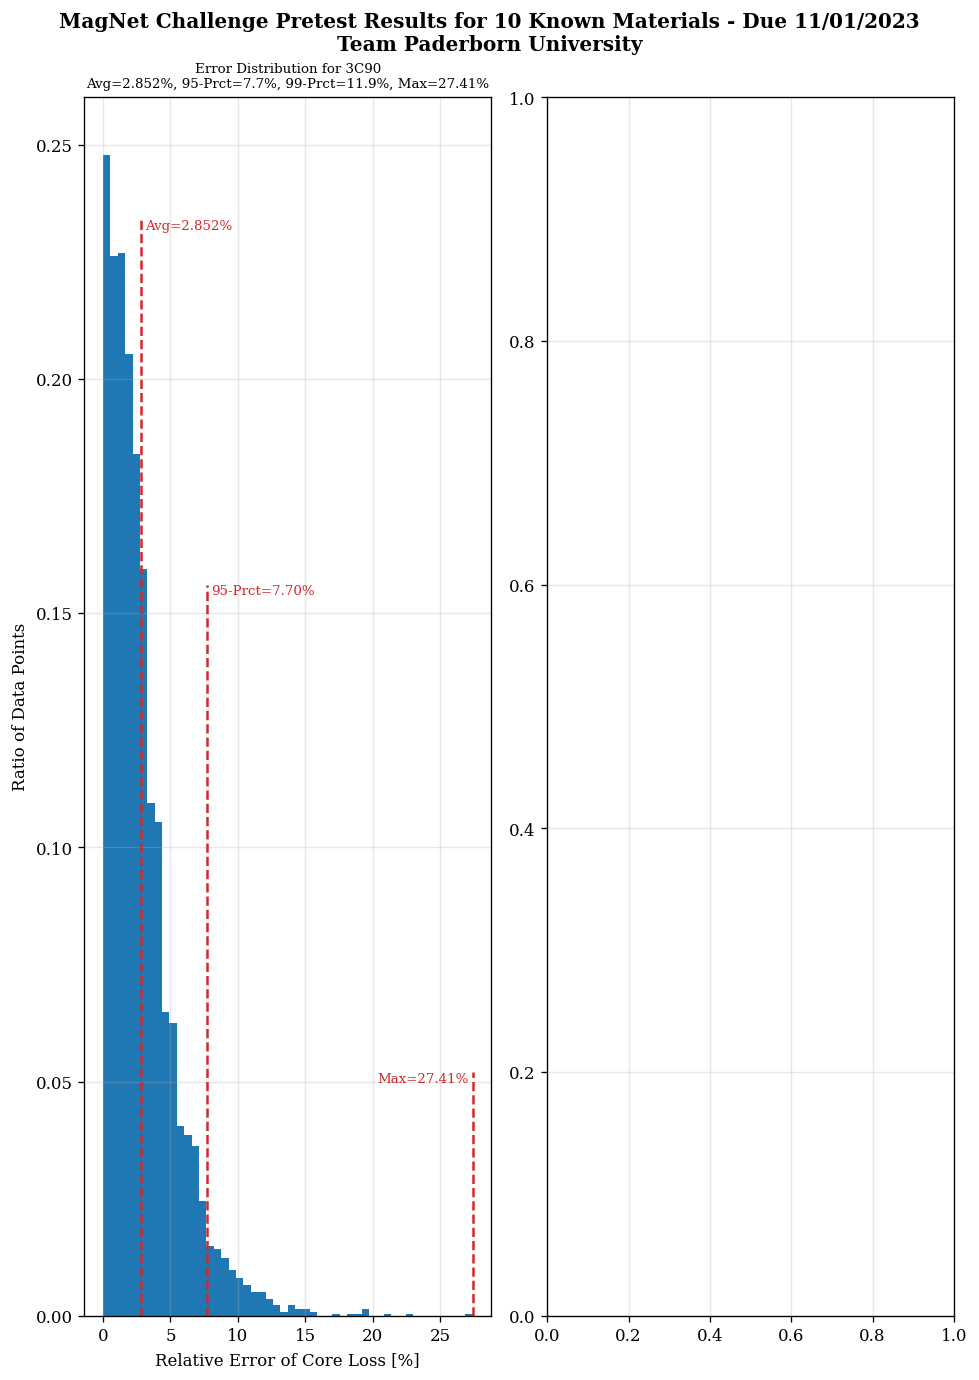

In [21]:
fig = visualize_rel_error_report(h_pred_val, ds)